# Load Libraries/Data

In [137]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# list of named time zones
import pytz
#all_tzs = pytz.all_timezones
#len(all_tzs)

# import the statsmodels time series analysis api module
# seasonal decompose
import statsmodels.tsa.api as tsa

# get peaks (max point) of each season
from scipy.signal import find_peaks

import holidays
import datetime as dt
from holidays import country_holidays

import glob


import warnings
warnings.filterwarnings('ignore')

In [4]:
q = 'Data/Chicago/Chicago-Crime_*.csv'
chunked_files = glob.glob(q)
# Showing the first 5
chunked_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [5]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in chunked_files])
df_combined

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380
...,...,...,...,...,...,...,...,...,...,...,...
13152058,07/25/2023 12:50:00 AM,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,412,4.0,8.0,41.742106,-87.569737
13152174,07/25/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,41.657677,-87.605272
13152725,07/25/2023 12:51:00 PM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,41.773458,-87.576184


In [14]:
df = df_combined.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310873 to 13152172
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 614.3+ MB


In [15]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

# Clean Features

In [16]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380


## Convert 'Date' to datetime dtype

In [17]:
fmt = '%m/%d/%Y %I:%M:%S %p'

In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'], format=fmt)

In [21]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
ID,,,,,,,,,,,,
1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145,2001-01-01 13:00:00
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00
1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828,2001-01-01 13:00:00
1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534,2001-01-01 01:00:00
1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380,2001-01-01 13:00:00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310873 to 13152172
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
 10  Longitude             float64       
 11  Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 674.2+ MB


## Set 'Datetime' As Index

In [22]:
df = df.set_index('Datetime')
df.head(2)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2001-01-01 13:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185


## Remove Unnecessary Columns

In [24]:
df.drop(columns=['Latitude', 'Longitude', 'Date'], inplace=True)
df.head(2)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
Datetime,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN


# Task

## **Topic 1) Comparing Police Districts:**
- **Which district has the most crimes?** 
    - *District 8 has the most crime with 527,600 counts*


- **Which has the least?**
    - *District 21 has the least with 4 counts*

In [40]:
print(df['Primary Type'].unique())
len(df['Primary Type'].unique())

['OTHER OFFENSE' 'BATTERY' 'PUBLIC PEACE VIOLATION' 'BURGLARY'
 'CRIMINAL DAMAGE' 'THEFT' 'MOTOR VEHICLE THEFT' 'DECEPTIVE PRACTICE'
 'OFFENSE INVOLVING CHILDREN' 'WEAPONS VIOLATION' 'CRIM SEXUAL ASSAULT'
 'SEX OFFENSE' 'NARCOTICS' 'ASSAULT' 'GAMBLING' 'LIQUOR LAW VIOLATION'
 'ROBBERY' 'CRIMINAL TRESPASS' 'INTERFERENCE WITH PUBLIC OFFICER'
 'HOMICIDE' 'KIDNAPPING' 'PROSTITUTION' 'STALKING' 'INTIMIDATION'
 'CRIMINAL SEXUAL ASSAULT' 'ARSON' 'RITUALISM' 'DOMESTIC VIOLENCE'
 'OBSCENITY' 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY'
 'CONCEALED CARRY LICENSE VIOLATION' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'NON - CRIMINAL']


36

### Remove 'NON-CRIMINAL' Primary Types

In [56]:
non_crime = df['Primary Type'].str.startswith('NON')

In [58]:
df1 = df[~non_crime]
df1

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
Datetime,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN
2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN
2001-01-01 13:00:00,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN
...,...,...,...,...,...,...,...,...
2023-07-25 00:50:00,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,412,4.0,8.0
2023-07-25 00:50:00,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0
2023-07-25 12:51:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0


In [59]:
len(df1['Primary Type'].unique())

33

### Get Counts of Districts

In [60]:
plot_1 = df1['District'].value_counts().sort_values()
plot_1

21.0         4
31.0       246
20.0    139064
17.0    226692
24.0    237561
22.0    257347
16.0    263080
14.0    303750
1.0     318337
15.0    336079
10.0    338482
5.0     347801
18.0    352720
19.0    353126
2.0     372209
9.0     383544
12.0    389761
3.0     398380
4.0     446043
25.0    446645
7.0     453427
6.0     459442
11.0    503785
8.0     527600
Name: District, dtype: int64

In [67]:
plot_1.values.sum()

7855125

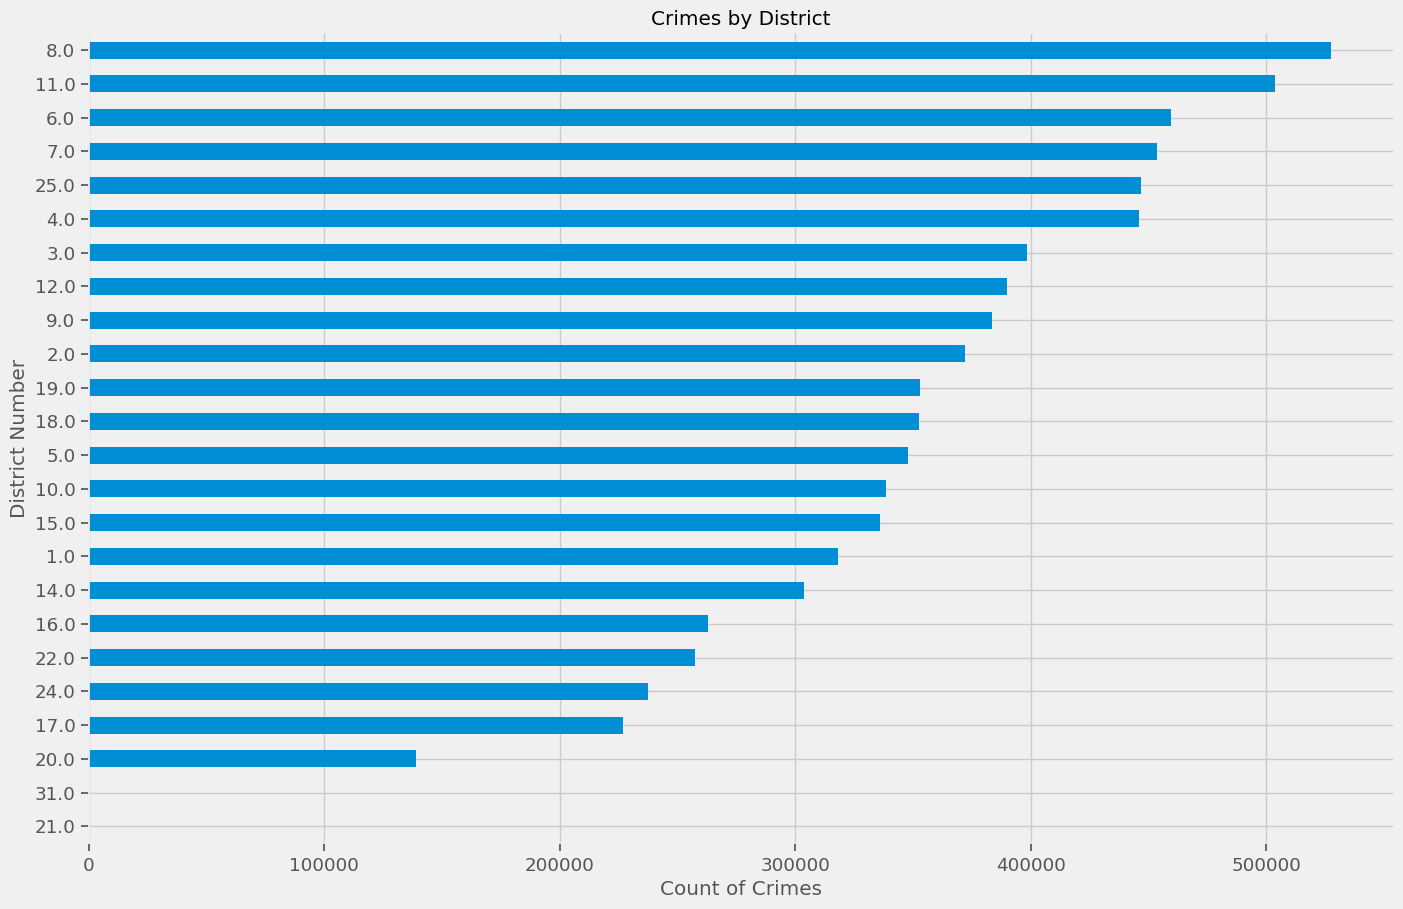

In [121]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_1.plot(kind='barh')

plt.xlabel('Count of Crimes')
plt.ylabel('District Number')
plt.title('Crimes by District');

## **Topic 2) Crimes Across the Years:**
- **Is the total number of crimes increasing or decreasing across the years?**
- *From 2001 to 2023, crime has decreased.*


- **Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?**
- *Seems to be some crimes have trended up, in contrast to the general trend down:*

    - 'CONCEALED CARRY LICENSE VIOLATION',
    - 'CRIMINAL SEXUAL ASSAULT',
    - 'HUMAN TRAFFICKING',
    - 'OBSCENITY',
    - 'STALKING',
    - 'WEAPONS VIOLATION'*

### Crimes Increasing or Decreasing Across the Years?

In [147]:
df2 = df[~non_crime]

In [149]:
df2['Year'] = df2.index.year

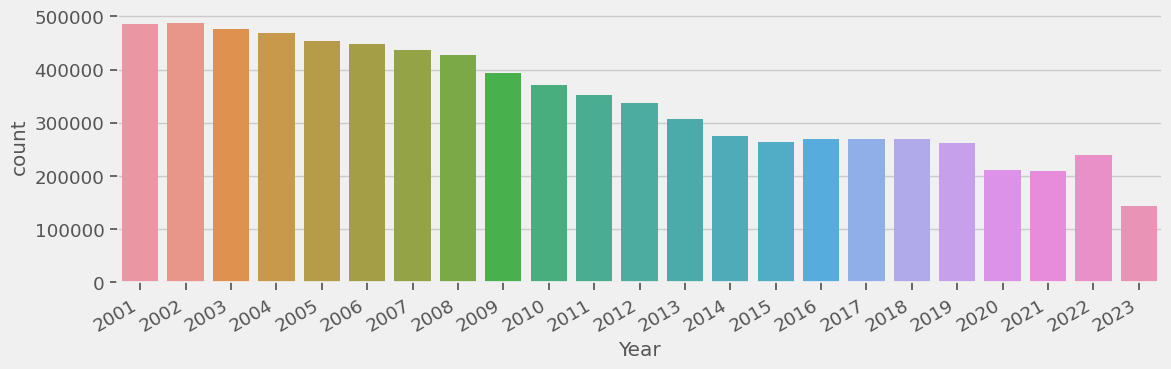

In [150]:
## Visualize years
ax = sns.countplot(data=df2, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [151]:
df2['Year'].value_counts().sort_index(ascending = False)

2023    142810
2022    238735
2021    208757
2020    212175
2019    261289
2018    268779
2017    269060
2016    269759
2015    264741
2014    275721
2013    307472
2012    336268
2011    351975
2010    370504
2009    392825
2008    427169
2007    437087
2006    448179
2005    453772
2004    469421
2003    475983
2002    486806
2001    485885
Name: Year, dtype: int64

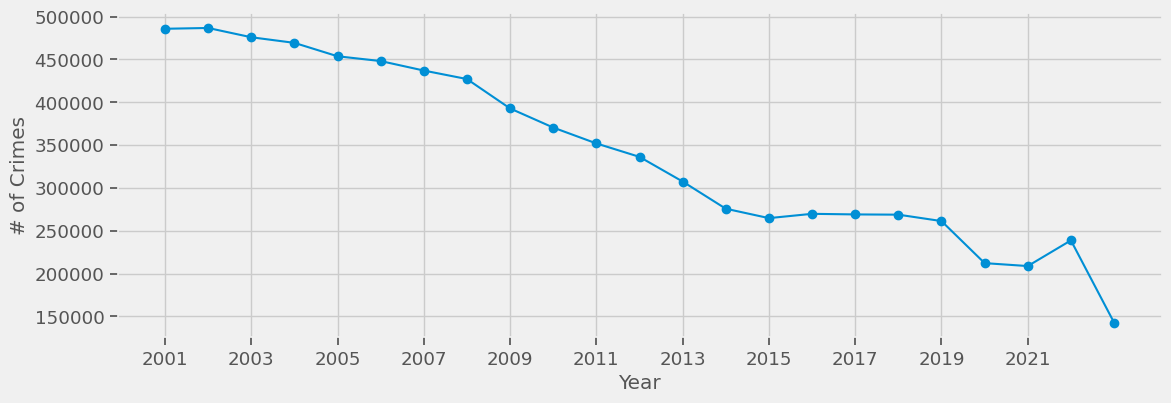

In [152]:
## save year counts
year_counts = df2['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year')

plt.xticks(np.arange(2001, 2023, step=2));

### Any Crimes Going Against the Overall Trend?

In [153]:
df2

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year
Datetime,,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,2001
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,2001
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,2001
2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,2001
2001-01-01 13:00:00,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,2001
...,...,...,...,...,...,...,...,...,...
2023-07-25 00:50:00,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,ALLEY,False,False,412,4.0,8.0,2023
2023-07-25 00:50:00,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,2023
2023-07-25 12:51:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,2023


In [167]:
crimes_by_year = df2.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6339
                   2020    8432
                   2021    8980
                   2022    8766
                   2023    5024
Name: Year, Length: 696, dtype: int64

In [209]:
## convert to dataframe and reset_index()
plot_df2 = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df2

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
691,WEAPONS VIOLATION,2019,6339
692,WEAPONS VIOLATION,2020,8432
693,WEAPONS VIOLATION,2021,8980
694,WEAPONS VIOLATION,2022,8766


In [210]:
# looping through the value counts series
val_counts_by_year = df2.groupby('Primary Type')['Year'].value_counts()
val_counts_by_year

Primary Type       Year
ARSON              2002    1032
                   2001    1011
                   2003     955
                   2004     778
                   2006     726
                           ... 
WEAPONS VIOLATION  2007    3554
                   2016    3450
                   2015    3364
                   2013    3245
                   2014    3113
Name: Year, Length: 696, dtype: int64

In [211]:
crime_list = val_counts_by_year.index.levels[0]
crime_list

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION',
       'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY',
       'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

In [172]:
val_counts_by_year.loc['ARSON'].agg(['idxmin', 'idxmax'])

idxmin    2023
idxmax    2002
Name: Year, dtype: int64

In [175]:
val_counts_by_year.loc['ARSON'].agg(['min', 'max'])

min     280
max    1032
Name: Year, dtype: int64

In [174]:
val_counts_by_year.loc['ARSON', 2023]

280

In [189]:
val_counts_by_year.index.get_level_values(0).unique()

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION',
       'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY',
       'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

In [198]:
positive_crime_trend = []

for crime in crime_list:
    min_indx, max_indx = val_counts_by_year.loc[crime].agg(['idxmin', 'idxmax'])
    min_val, max_val = val_counts_by_year.loc[crime].agg(['min', 'max'])
    
    if max_indx > min_indx:
        print(crime)
        print('Min', 'Max')
        print(min_indx, max_indx)
        print(min_val, max_val)
        print('')
        
        positive_crime_trend.append(crime)

CONCEALED CARRY LICENSE VIOLATION
Min Max
2001 2019
1 217

CRIMINAL SEXUAL ASSAULT
Min Max
2002 2022
27 1554

HUMAN TRAFFICKING
Min Max
2010 2022
1 18

OBSCENITY
Min Max
2007 2017
12 87

STALKING
Min Max
2014 2022
142 443

WEAPONS VIOLATION
Min Max
2014 2021
3113 8980



In [212]:
positive_crime_trend

['CONCEALED CARRY LICENSE VIOLATION',
 'CRIMINAL SEXUAL ASSAULT',
 'HUMAN TRAFFICKING',
 'OBSCENITY',
 'STALKING',
 'WEAPONS VIOLATION']

In [221]:
plot_positive_trend = plot_df2[plot_df2['Primary Type'].isin(positive_crime_trend)].reset_index()
plot_positive_trend

,index,Primary Type,Year,# of Crimes
0,92,CONCEALED CARRY LICENSE VIOLATION,2001,1
1,93,CONCEALED CARRY LICENSE VIOLATION,2014,15
2,94,CONCEALED CARRY LICENSE VIOLATION,2015,34
3,95,CONCEALED CARRY LICENSE VIOLATION,2016,36
4,96,CONCEALED CARRY LICENSE VIOLATION,2017,69
...,...,...,...,...
110,691,WEAPONS VIOLATION,2019,6339
111,692,WEAPONS VIOLATION,2020,8432
112,693,WEAPONS VIOLATION,2021,8980
113,694,WEAPONS VIOLATION,2022,8766


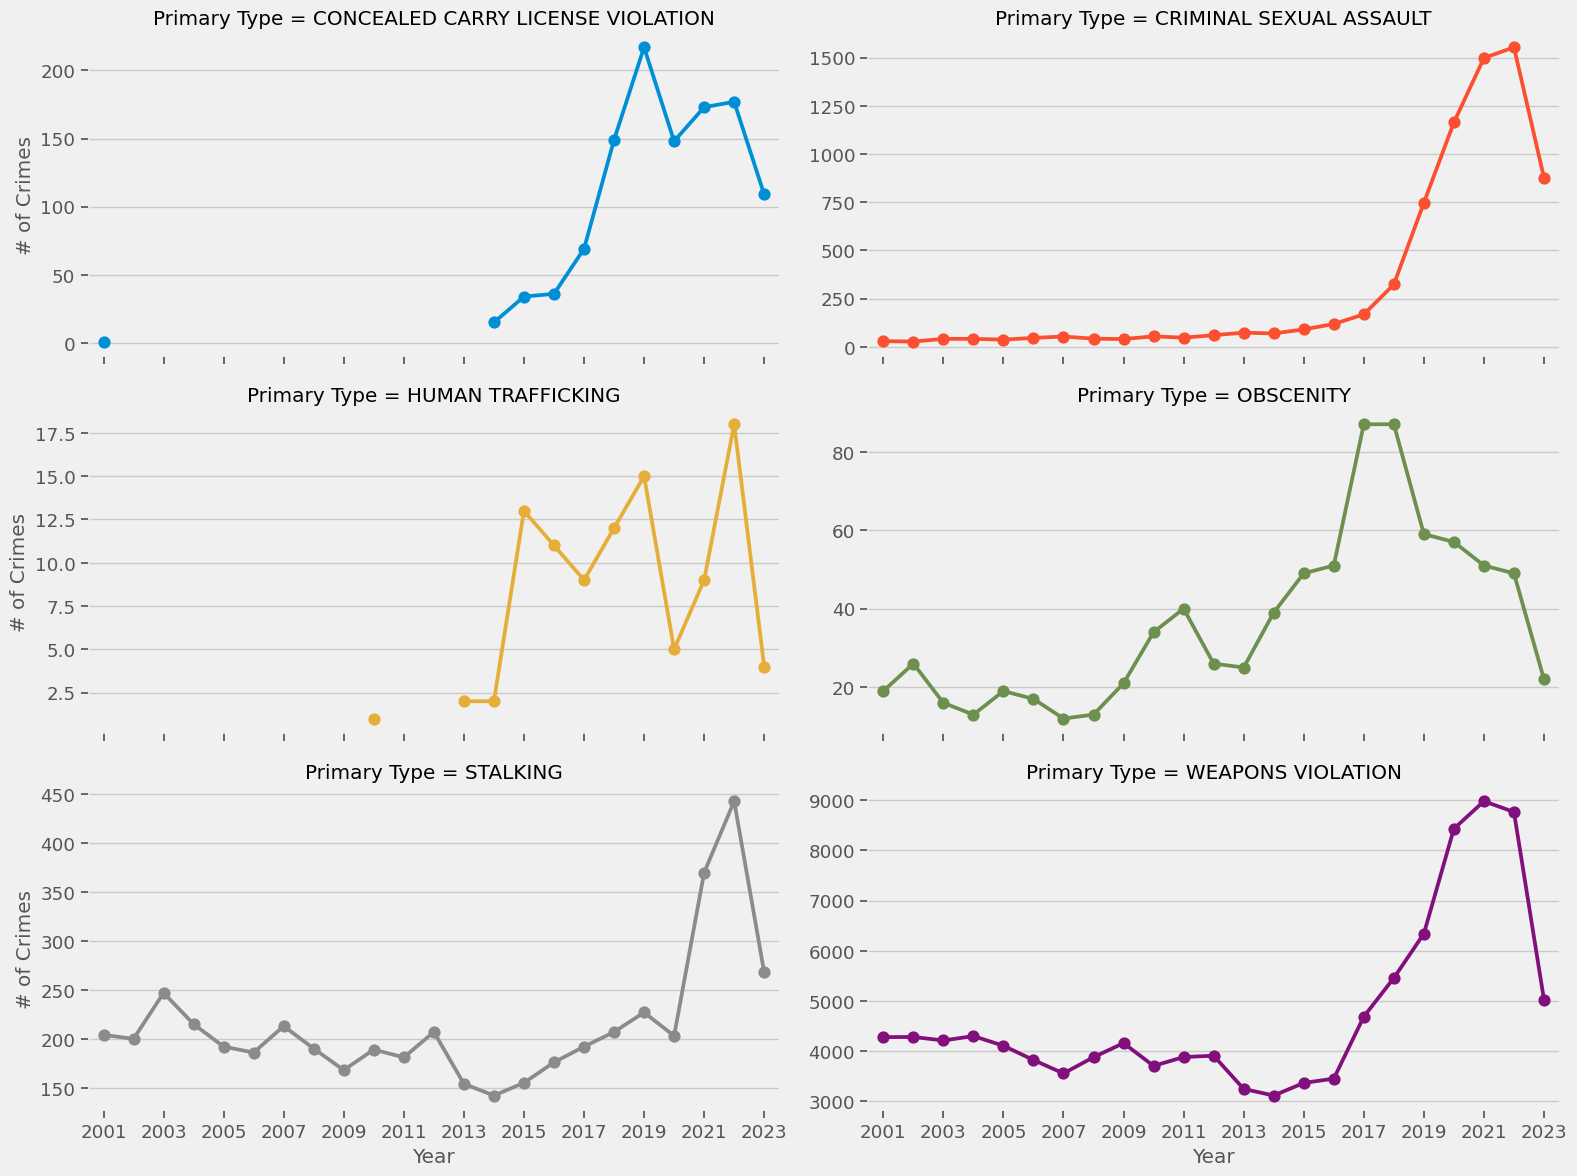

In [241]:
a = sns.catplot(data=plot_positive_trend, x='Year', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2, aspect=2,
            height=4,kind='point',sharey=False)
plt.xticks(np.arange(0,23, step=2));